In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
## 1-(a)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

train_data = pd.read_csv('/content/gdrive/MyDrive/Data/Gisette/gisette_train.data', sep = '\s+', header = None)
train_label = pd.read_csv('/content/gdrive/MyDrive/Data/Gisette/gisette_train.labels', sep = '\s+', header = None)
test_data = pd.read_csv('/content/gdrive/MyDrive/Data/Gisette/gisette_valid.data', sep = '\s+', header = None)
test_label = pd.read_csv('/content/gdrive/MyDrive/Data/Gisette/gisette_valid.labels', sep = '\s+', header = None)

scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)
train_label[train_label == -1] = 0
test_label[test_label == -1] = 0

In [ ]:
lmbd = np.arange(0.03, 0.21, 0.005)
train_mis = np.zeros((len(lmbd), 100))
test_mis = np.zeros((len(lmbd), 100))
train_scores = np.zeros((len(lmbd), train_data.shape[0]))
test_scores = np.zeros((len(lmbd), test_data.shape[0]))
feanum = np.zeros((len(lmbd), 100))
model = LogisticRegression(fit_intercept = False).fit(train_data, train_label.values.ravel()) # Initialization of the model. No further meaning
for j, l in enumerate(lmbd):
  w = np.zeros((train_data.shape[1], 1)).ravel()
  for i in range(100):
    xw = np.matmul(train_data, w)
    in_bracket = train_label.values.ravel() - (1 / (1 + np.exp(-xw)))
    w = w + np.matmul(in_bracket, train_data) / train_data.shape[0]
    w[np.absolute(w) <= l] = 0
    feanum[j, i] = np.count_nonzero(w)
    model.coef_ = w
    train_mis[j, i] = (1 - accuracy_score(model.predict(train_data), train_label))
    test_mis[j, i] = (1 - accuracy_score(model.predict(test_data), test_label))
  train_scores[j, :] = model.predict_proba(train_data)[:, 1].ravel()
  test_scores[j, :] = model.predict_proba(test_data)[:, 1].ravel()

In [ ]:
print(pd.DataFrame({'Lambda' : lmbd, 'Num. of selected features' : feanum[:, 99].astype(int), 'Training misc. error' : train_mis[:, 99], 'Test misc. error' : test_mis[:, 99]}))

    Lambda  Num. of selected features  Training misc. error  Test misc. error
0    0.030                        639              0.006000             0.012
1    0.035                        561              0.005833             0.014
2    0.040                        467              0.010333             0.016
3    0.045                        378              0.010833             0.018
4    0.050                        327              0.011500             0.017
5    0.055                        278              0.012667             0.015
6    0.060                        236              0.016000             0.019
7    0.065                        185              0.019333             0.018
8    0.070                        160              0.022333             0.022
9    0.075                        143              0.023667             0.022
10   0.080                        125              0.025667             0.025
11   0.085                        115              0.025833     

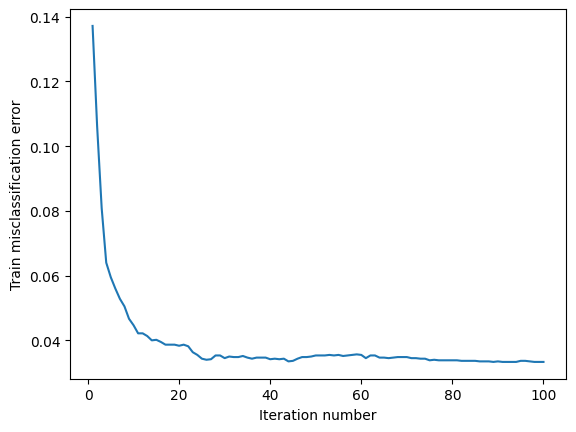

In [ ]:
plt.plot(np.arange(1, 101), train_mis[12, :])
plt.xlabel('Iteration number')
plt.ylabel('Train misclassification error')
plt.show()

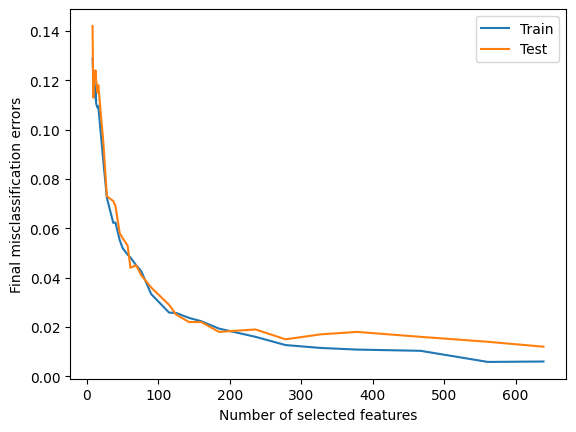

In [ ]:
plt.plot(feanum[:, 99], train_mis[:, 99])
plt.plot(feanum[:, 99], test_mis[:, 99])
plt.legend(['Train', 'Test'])
plt.xlabel('Number of selected features')
plt.ylabel('Final misclassification errors')
plt.show()

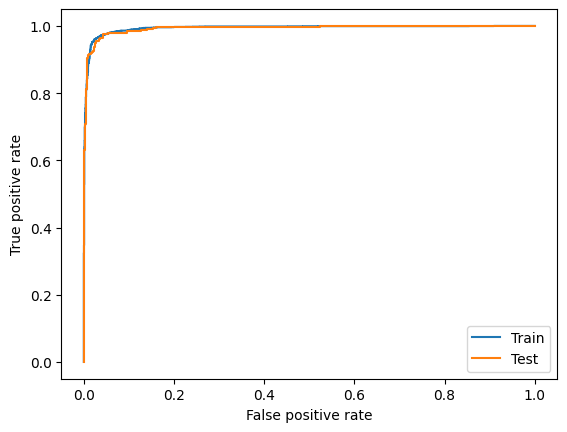

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(train_label, train_scores[12, :])
plt.plot(fpr, tpr)
fpr, tpr, thresholds = roc_curve(test_label, test_scores[12, :])
plt.plot(fpr, tpr)
plt.legend(['Train', 'Test'])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [ ]:
## 1-(b)
train_data = pd.read_csv('/content/gdrive/MyDrive/Data/MADELON/madelon_train.data', sep = "\s+", header = None)
train_label = pd.read_csv('/content/gdrive/MyDrive/Data/MADELON/madelon_train.labels', header = None)
test_data = pd.read_csv('/content/gdrive/MyDrive/Data/MADELON/madelon_valid.data', sep = "\s+", header = None)
test_label = pd.read_csv('/content/gdrive/MyDrive/Data/MADELON/madelon_valid.labels', header = None)

scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)
train_label[train_label == -1] = 0
test_label[test_label == -1] = 0

In [ ]:
lmbd = np.arange(0.001, 0.031, 0.001)
train_mis = np.zeros((len(lmbd), 100))
test_mis = np.zeros((len(lmbd), 100))
train_scores = np.zeros((len(lmbd), train_data.shape[0]))
test_scores = np.zeros((len(lmbd), test_data.shape[0]))
feanum = np.zeros((len(lmbd), 100))
model = LogisticRegression(fit_intercept = False).fit(train_data, train_label.values.ravel()) # Initialization of the model. No further meaning
for j, l in enumerate(lmbd):
  w = np.zeros((train_data.shape[1], 1)).ravel()
  for i in range(100):
    xw = np.matmul(train_data, w)
    in_bracket = train_label.values.ravel() - (1 / (1 + np.exp(-xw)))
    w = w + np.matmul(in_bracket, train_data) / train_data.shape[0]
    w[np.absolute(w) <= l] = 0
    feanum[j, i] = np.count_nonzero(w)
    model.coef_ = w
    train_mis[j, i] = (1 - accuracy_score(model.predict(train_data), train_label))
    test_mis[j, i] = (1 - accuracy_score(model.predict(test_data), test_label))
  train_scores[j, :] = model.predict_proba(train_data)[:, 1].ravel()
  test_scores[j, :] = model.predict_proba(test_data)[:, 1].ravel()

In [ ]:
print(pd.DataFrame({'Lambda' : lmbd, 'Num. of selected features' : feanum[:, 99].astype(int), 'Training misc. error' : train_mis[:, 99], 'Test misc. error' : test_mis[:, 99]}))

    Lambda  Num. of selected features  Training misc. error  Test misc. error
0    0.001                        473                0.2590          0.425000
1    0.002                        439                0.2595          0.420000
2    0.003                        419                0.2620          0.426667
3    0.004                        390                0.2615          0.425000
4    0.005                        372                0.2655          0.426667
5    0.006                        340                0.2700          0.430000
6    0.007                        313                0.2700          0.430000
7    0.008                        279                0.2695          0.431667
8    0.009                        260                0.2725          0.433333
9    0.010                        241                0.2700          0.435000
10   0.011                        211                0.2765          0.448333
11   0.012                        193                0.2805     

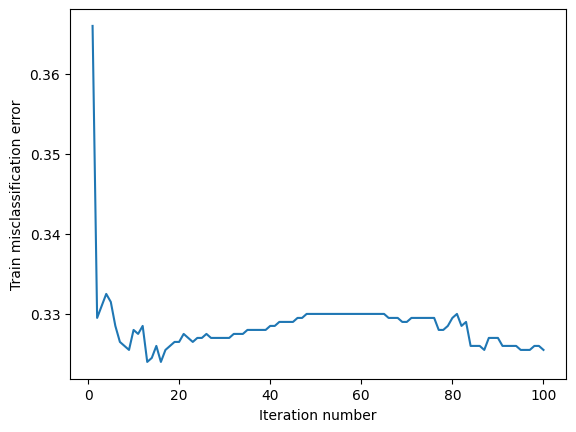

In [ ]:
plt.plot(np.arange(1, 101), train_mis[16, :])
plt.xlabel('Iteration number')
plt.ylabel('Train misclassification error')
plt.show()

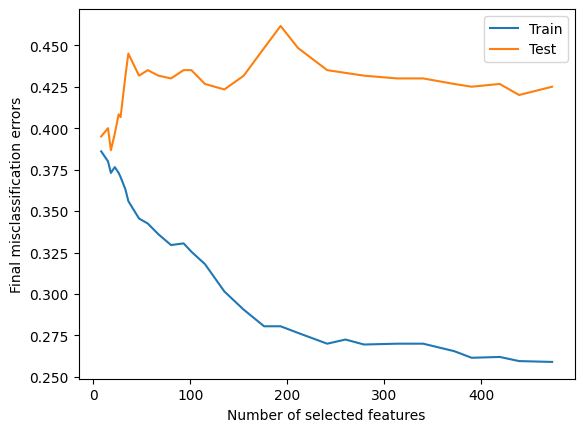

In [ ]:
plt.plot(feanum[:, 99], train_mis[:, 99])
plt.plot(feanum[:, 99], test_mis[:, 99])
plt.legend(['Train', 'Test'])
plt.xlabel('Number of selected features')
plt.ylabel('Final misclassification errors')
plt.show()

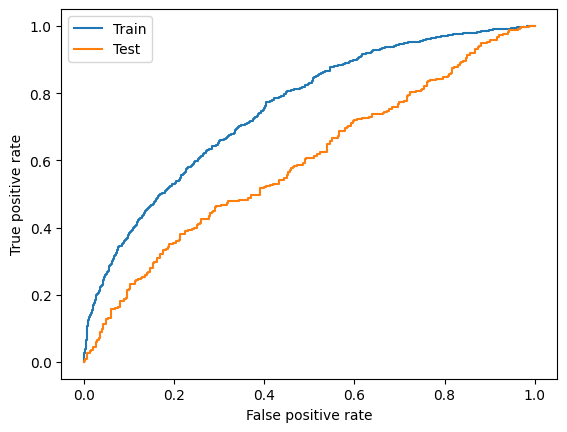

In [ ]:
fpr, tpr, thresholds = roc_curve(train_label, train_scores[16, :])
plt.plot(fpr, tpr)
fpr, tpr, thresholds = roc_curve(test_label, test_scores[12, :])
plt.plot(fpr, tpr)
plt.legend(['Train', 'Test'])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [ ]:
## 1-(c)
train_data = pd.read_csv('/content/gdrive/MyDrive/Data/dexter/dexter_train.csv', header = None)
train_label = pd.read_csv('/content/gdrive/MyDrive/Data/dexter/dexter_train.labels', header = None)
test_data = pd.read_csv('/content/gdrive/MyDrive/Data/dexter/dexter_valid.csv', header = None)
test_label = pd.read_csv('/content/gdrive/MyDrive/Data/dexter/dexter_valid.labels', header = None)

scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)
train_label[train_label == -1] = 0
test_label[test_label == -1] = 0

In [ ]:
lmbd = np.arange(0.045, 0.15, 0.005)
train_mis = np.zeros((len(lmbd), 100))
test_mis = np.zeros((len(lmbd), 100))
train_scores = np.zeros((len(lmbd), train_data.shape[0]))
test_scores = np.zeros((len(lmbd), test_data.shape[0]))
feanum = np.zeros((len(lmbd), 100))
model = LogisticRegression(fit_intercept = False).fit(train_data, train_label.values.ravel()) # Initialization of the model. No further meaning
for j, l in enumerate(lmbd):
  w = np.zeros((train_data.shape[1], 1)).ravel()
  for i in range(100):
    xw = np.matmul(train_data, w)
    in_bracket = train_label.values.ravel() - (1 / (1 + np.exp(-xw)))
    w = w + np.matmul(in_bracket, train_data) / train_data.shape[0]
    w[np.absolute(w) <= l] = 0
    feanum[j, i] = np.count_nonzero(w)
    model.coef_ = w
    train_mis[j, i] = (1 - accuracy_score(model.predict(train_data), train_label))
    test_mis[j, i] = (1 - accuracy_score(model.predict(test_data), test_label))
  train_scores[j, :] = model.predict_proba(train_data)[:, 1].ravel()
  test_scores[j, :] = model.predict_proba(test_data)[:, 1].ravel()

In [ ]:
print(pd.DataFrame({'Lambda' : lmbd, 'Num. of selected features' : feanum[:, 99].astype(int), 'Training misc. error' : train_mis[:, 99], 'Test misc. error' : test_mis[:, 99]}))

    Lambda  Num. of selected features  Training misc. error  Test misc. error
0    0.045                        552              0.000000          0.090000
1    0.050                        367              0.000000          0.073333
2    0.055                        260              0.000000          0.066667
3    0.060                        192              0.000000          0.083333
4    0.065                        147              0.003333          0.093333
5    0.070                        103              0.016667          0.080000
6    0.075                         82              0.013333          0.090000
7    0.080                         71              0.020000          0.113333
8    0.085                         57              0.026667          0.126667
9    0.090                         46              0.033333          0.123333
10   0.095                         37              0.040000          0.126667
11   0.100                         26              0.063333     

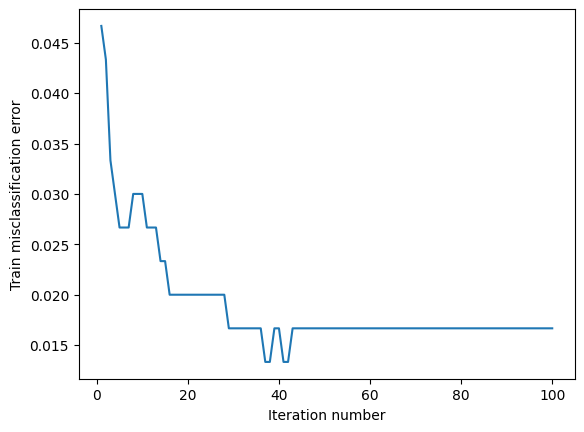

In [ ]:
plt.plot(np.arange(1, 101), train_mis[5, :])
plt.xlabel('Iteration number')
plt.ylabel('Train misclassification error')
plt.show()

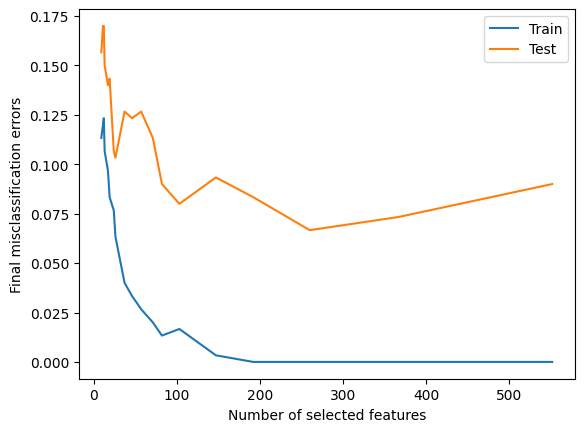

In [ ]:
plt.plot(feanum[:, 99], train_mis[:, 99])
plt.plot(feanum[:, 99], test_mis[:, 99])
plt.legend(['Train', 'Test'])
plt.xlabel('Number of selected features')
plt.ylabel('Final misclassification errors')
plt.show()

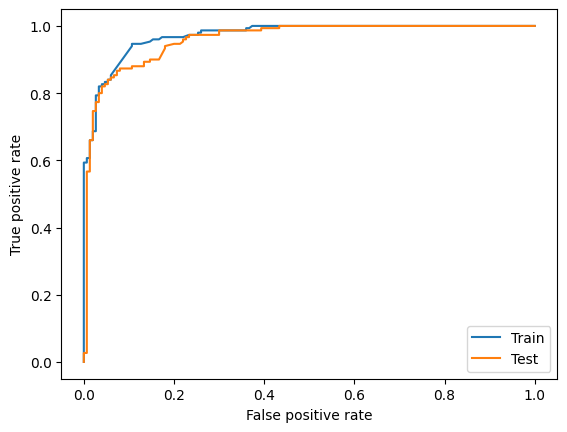

In [ ]:
fpr, tpr, thresholds = roc_curve(train_label, train_scores[16, :])
plt.plot(fpr, tpr)
fpr, tpr, thresholds = roc_curve(test_label, test_scores[12, :])
plt.plot(fpr, tpr)
plt.legend(['Train', 'Test'])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()